# Simple Bootstrap Example

In this example we will create a normal distribution and take a smaller sample. From the sample, we show how to estimate the true mean and standard deviation of the larger population.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import numpy.random as npr

import collections

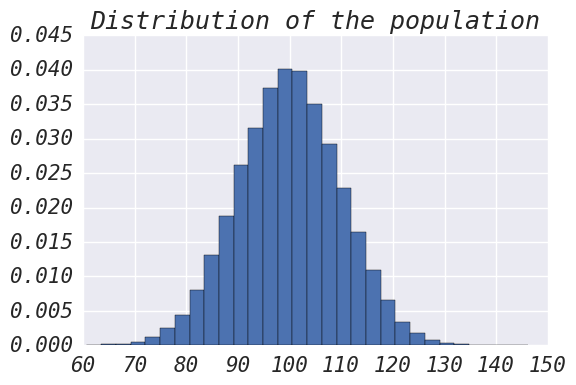

In [2]:
mean = 100
stdev = 10

population = np.random.normal(loc=mean, scale=stdev, size=50000)

# Plot the population
count, bins, ignored = plt.hist(population, 30, normed=True)

plt.title('Distribution of the population')
plt.show()

In [3]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [4]:
# take 1k 'samples' from the larger population
samples = population[:1000]

In [5]:
# calculate bootstrap estimates for the mean and standard deviation
mean_results = bs.bootstrap(samples, stat_func=bs_stats.mean)

# see advanced_bootstrap_features.ipynb for a discussion of how to use the stat_func arg
stdev_results = bs.bootstrap(samples, stat_func=lambda x: np.std(x, axis=1))

In [7]:
print('Bootstrapped mean should be: {}'.format(mean))
print('\t' + str(mean_results))
print('')
print('Bootstrapped stdev should be: {}'.format(stdev))
print('\t' + str(stdev_results))

Bootstrapped mean should be: 100
	99.6784217817    (99.0534076992, 100.29253268)

Bootstrapped stdev should be: 10
	10.0379876613    (9.62010561362, 10.4949048736)


## Analysis
We found the mean and standard deviation we estimated are close to the true values. The bootstrap function also gives us error bars associated with the estimate.